# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# import tools. for visualization, pandas methods for dataframes and series, and scipy for statistics
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# define the path for csv files from the current location in directory
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# read the data and turn the readers into variables to call on for each data frame
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# merge into one data frame on the Mouse ID
df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
#find how many mice are present in the dataframe based on unique values for Mouse ID
mice_count = df["Mouse ID"].nunique()
mice_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#so need to find duplicates that are duplicate in both Mouse ID and Timepoint columns as these are the two unique identifiers for each "test". I do wonder though why Mouse ID would not be enough.
#we are assigning the variable duplicates to a dataframe which is made up of running the method function of "duplicated" on the OG df with the parameters of subset columns Mouse ID and Timepoint.
duplicates = df[df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice = duplicates['Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [12]:
mouse_g989 = df[df['Mouse ID'] == 'g989']

mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#the ! removes all rows where it equals g989 in the Mouse ID
#df_clean equals the dataframe but with the g989 row dropped from the Mouse ID column of the dataframe
df_clean = df[df['Mouse ID'] != 'g989']
df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = df_clean["Mouse ID"].nunique()

mice_count_clean

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM(standard error of the mean, standard deviation for samples) of the tumor volume for each regimen
regimen_tumorvol_summary = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

regimen_tumorvol_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

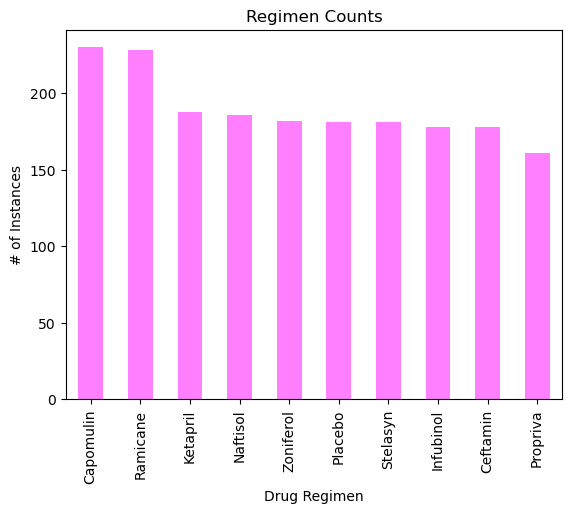

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#the number of each drug regimen instance, aka the number of times each drug regimen is listed, from column
#drug regimen of the data frame, assign to variable drug regimen counts
drug_regimen_counts = df['Drug Regimen'].value_counts()

drug_regimen_counts.plot(kind='bar', color='fuchsia', alpha=.5)

plt.title('Regimen Counts')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Instances')

plt.show()

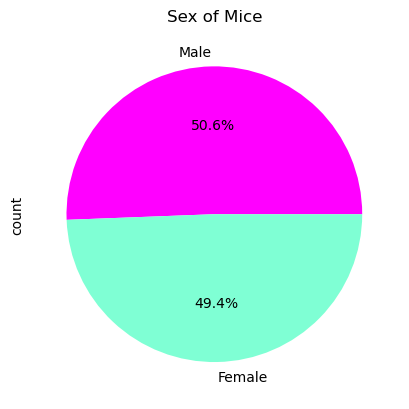

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = df['Sex'].value_counts()

#autopct is automatic percentage labels with the suggested formatting to one decimal place
mice_sex.plot(kind='pie', colors=['fuchsia', 'aquamarine'], autopct='%1.1f%%')

plt.title('Sex of Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#naming the regimens we want to analyze
the_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#we want the rows that will give us tumor volume at the max timepoint for each regimen, so rows_we_want is equal to the dataframe of the dataframe column "Drug Regimen" with only the specified regimens.
rows_we_want = df[df['Drug Regimen'].isin(the_regimens)]

#to see the final tumor volumes, we want to access the rows we want(of the right regimen), and group by
#the max of timepoint for each drug regimen
final_tumor_volumes = rows_we_want.loc[rows_we_want.groupby("Drug Regimen")["Timepoint"].idxmax()]

final_tumor_volumes = final_tumor_volumes.drop(["Sex", "Age_months", "Weight (g)", "Metastatic Sites"], axis=1)

final_tumor_volumes.head(20)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
19,s185,Capomulin,45,23.343598
493,a275,Ceftamin,45,62.999356
463,a203,Infubinol,45,67.973419
9,k403,Ramicane,45,22.050126


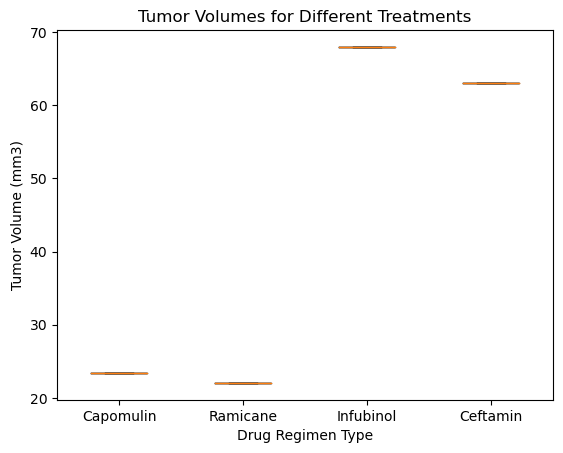

In [21]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []

#for each index in treatments
for regimen in treatments:
    
    #.loc allows you to select rows and columns based on labels or booleans
    treatments_df = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
  
    tumor_vol_data.append(treatments_df)

    
    quartiles = treatments_df.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    IQR = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * IQR
    upper_bound = upper_quartile + 1.5 * IQR
    
    # Identify potential outliers
    outliers = treatments_df[(treatments_df < lower_bound) | (treatments_df > upper_bound)]

plt.boxplot(tumor_vol_data, labels = treatments)
plt.title('Tumor Volumes for Different Treatments')
plt.xlabel('Drug Regimen Type')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

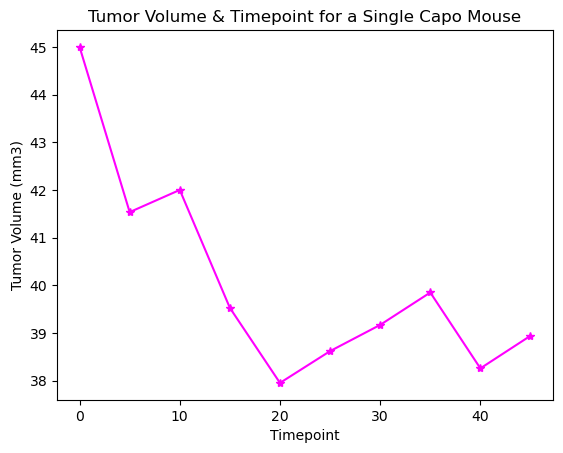

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capo_mouse_id = "b742"

#create a df for capomulin_df using the booleans true false for rows of drug regimen in df matching capomulin
capomulin_df = df[df['Drug Regimen'] == 'Capomulin']

capo_mouse_df = capomulin_df[capomulin_df['Mouse ID'] == capo_mouse_id]

plt.plot(capo_mouse_df['Timepoint'],capo_mouse_df['Tumor Volume (mm3)'], marker= '*', color = "fuchsia", label = 'Single Capo Mouse')
plt.title('Tumor Volume & Timepoint for a Single Capo Mouse')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

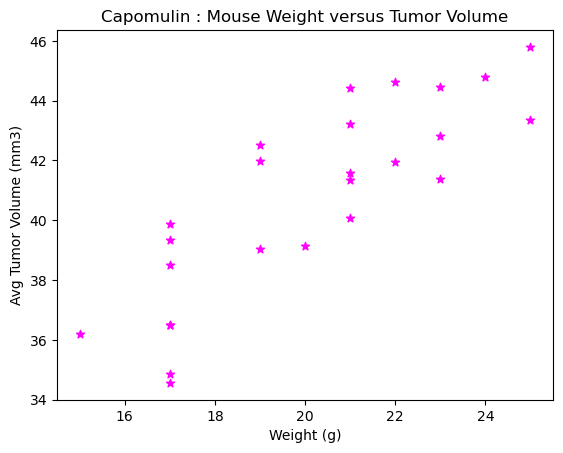

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

avg_tum_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, avg_tum_vol, color='fuchsia', marker='*')

plt.title('Capomulin : Mouse Weight versus Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

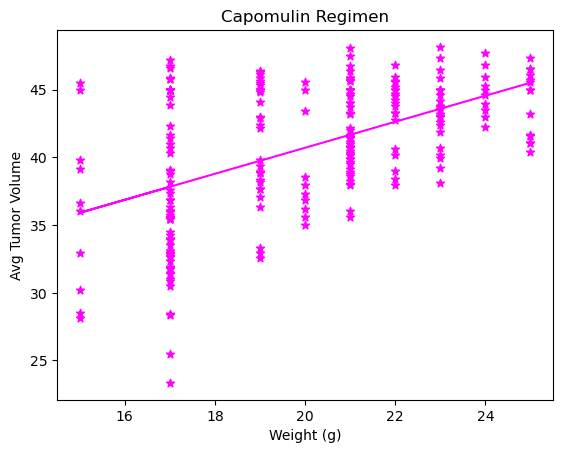

In [28]:
from scipy.stats import linregress

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#capomulin_df = df[df['Drug Regimen'] == 'Capomulin']
#linregress expects arrays not df
x_values = capomulin_df['Tumor Volume (mm3)']
y_values = capomulin_df['Weight (g)']

slope, intercept, r_value, p_value, std_err = linregress(y_values, x_values)

regression_line = slope * y_values + intercept

plt.scatter(y_values, x_values, color='fuchsia', marker='*')

plt.plot(y_values, regression_line, color='fuchsia')

plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume')
plt.show()


# Thank You!